. Assignment on Classification technique Every year many students give the GRE exam to get admission in foreign Universities. The data set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes). Admitted is the target variable. Data Set: https://www.kaggle.com/mohansacharya/graduate-admissions The counselor of the firm is supposed check whether the student will get an admission or not based on his/her GRE score and Academic Score. So to help the counselor to take appropriate decisions build a machine learning model classifier using Decision tree to predict whether a student will get admission or not. a) Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if necessary. b) Perform data-preparation (Train-Test Split) c) Apply Machine Learning Algorithm d) Evaluate Model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('admission.csv')


In [3]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


drop unecessary colm

In [4]:
dataset.drop('Serial No.', axis=1, inplace=True)

rename last column

In [5]:
dataset.rename(columns={'Chance of Admit ': 'Admitted'}, inplace=True)
dataset['Admitted'] = (dataset['Admitted'] >= 0.5).astype(int)  # Convert to 0 and 1

feature selection

In [6]:
X = dataset[['CGPA','GRE Score']]
y = dataset['Admitted']

In [7]:
X

,CGPA,GRE Score
0,9.65,337
1,8.87,324
2,8.00,316
3,8.67,322
4,8.21,314
...,...,...
495,9.02,332
496,9.87,337
497,9.56,330
498,8.43,312


In [8]:
y

,Admitted
0,1
1,1
2,1
3,1
4,1
...,...
495,1
496,1
497,1
498,1


In [9]:
dataset.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Admitted,0


splitting ds

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

standard scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

training model

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

prediction

In [13]:
classifier.predict(X_train)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [14]:
y_pred = classifier.predict(X_test)

making confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  4   5]
 [ 11 105]]


0.872

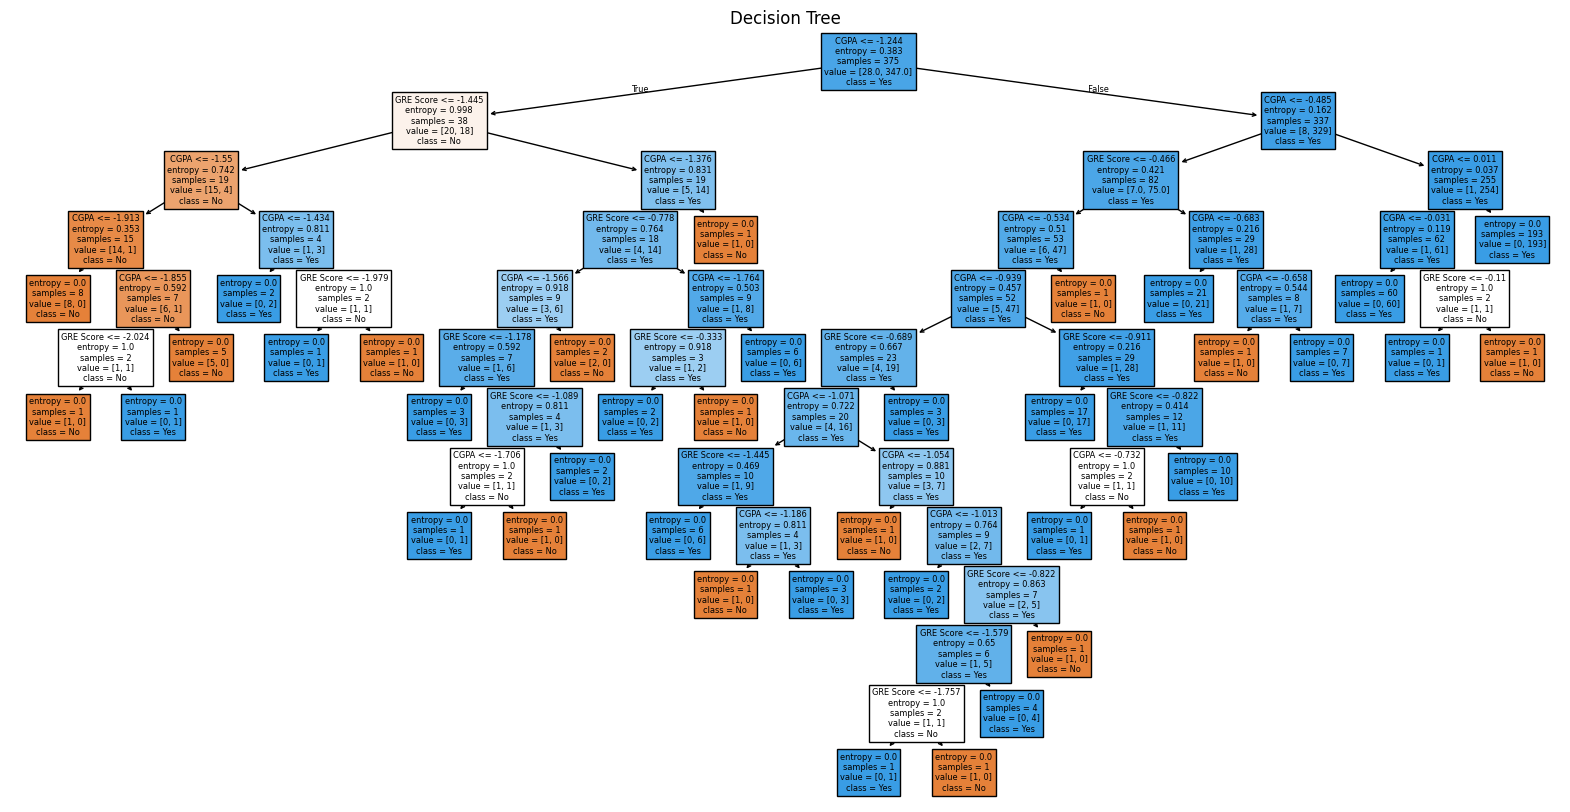

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Wider for deeper trees
plot_tree(classifier,
          filled=True,
          feature_names=X.columns,  # or list of column names
          class_names=['No', 'Yes'])  # adjust according to your labels
plt.title("Decision Tree")
plt.show()